# **Project 4 - Part 1 (Core)**

- ***Darlene Adams***

This project is to help predict metabolic syndrome and what key indicators we can discover in recognizing risk factors.

## **Part 1**

#### **Steps**

- Explore/clean the data
- Exploratory Visualizations
    - Creating exploratory visualizations to understand your data and search for trends.
- Choose a model
    - Preprocess data
    - Fit and evaluate a default model
    - Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)
    - Add your observations in a Markdown: Do these features make sense based on the business case?
- Create Explanatory Visualizations for the most important features.
    - Select 2 out of the top 10 features from your permutation importances and produce explanatory visualizations showing the relationship between the feature and the target.
    - The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.
        - These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience

#### **Import Libraries**

In [1]:
# Numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Pandas
import pandas as pd

# Warnings
import warnings

# Model Validation Train Test Spit
from sklearn.model_selection import train_test_split, GridSearchCV

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

#  SK Learn Display
from sklearn import set_config
set_config(transform_output='pandas')

#### **Notebook Defaults and Runtime Configurations**

In [2]:
# Set filter warnings to ignore
warnings.filterwarnings('ignore')

In [3]:
# Display all columns
pd.set_option('display.max_column', None)

# Display all rows
pd.set_option('display.max_rows', None)

In [4]:
#  SK Learn Display
set_config(display='diagram')

## **Load Data**

In [5]:
# load data
df = pd.read_csv('Data/Metabolic  Syndrome.csv')
# preview data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [6]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [7]:
df = df.set_index('seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
seqn,,,,,,,,,,,,,,
62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [8]:
# Make a copy of original df to avoid any manipulations
eda_ml = df.copy()

The following column does not match its dtype.

- Income

### **Check for Duplicated, Missing, or Erroneous Data**

In [9]:
# Check to see if there are any duplicate rows
eda_ml.duplicated().sum()

0

In [10]:
# Check the value_counts for Income
eda_ml['Income'].value_counts()

9000.0    337
2500.0    257
3500.0    228
1000.0    210
2000.0    207
1600.0    190
8200.0    178
6200.0    138
4500.0    136
800.0     123
5400.0    103
300.0      93
1700.0     54
1500.0     30
Name: Income, dtype: int64

In [11]:
# Change the datatype of the 'Income' column to integer
eda_ml['Income'] = eda_ml['Income'].astype('Int64')
eda_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 62161 to 71915
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   Int64  
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   object 
dtypes: Int64(1), float64(4), int64(5), object(4)
memory usage: 283.7+ KB


### Identify and address any inconsistencies in categorical values

In [12]:
# Create a list of string columns
string_cols = eda_ml.select_dtypes('object').columns

In [13]:
# Loop through the list of string columns
for col in string_cols:

  # Print the column name
  print(col)

  # print the value counts for the column
  print(eda_ml[col].value_counts())

  # Print an empty line for readability
  print()

Sex
Female    1211
Male      1190
Name: Sex, dtype: int64

Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64

Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64

MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64



There are no inconsistencies in the categorical columns

### Identify and address any inappropriate or unusual data points

In [14]:
# Display the descriptive statistics for the numerical columns
eda_ml.describe().round()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.0,2284.0,2316.0,2375.0,2401.0,2401.0,2401.0,2401.0,2401.0,2401.0
mean,49.0,4005.0,98.0,29.0,0.0,44.0,5.0,108.0,53.0,128.0
std,18.0,2954.0,16.0,7.0,0.0,258.0,1.0,35.0,15.0,95.0
min,20.0,300.0,56.0,13.0,0.0,1.0,2.0,39.0,14.0,26.0
25%,34.0,1600.0,87.0,24.0,0.0,4.0,4.0,92.0,43.0,75.0
50%,48.0,2500.0,97.0,28.0,0.0,7.0,5.0,99.0,51.0,103.0
75%,63.0,6200.0,108.0,32.0,0.0,14.0,6.0,110.0,62.0,150.0
max,80.0,9000.0,176.0,69.0,2.0,5928.0,11.0,382.0,156.0,1562.0


### Missing Values

In [15]:
# Display the sum of missing values
eda_ml.isna().sum().sum()

436

In [16]:
# Display the sum of missing values
eda_ml.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

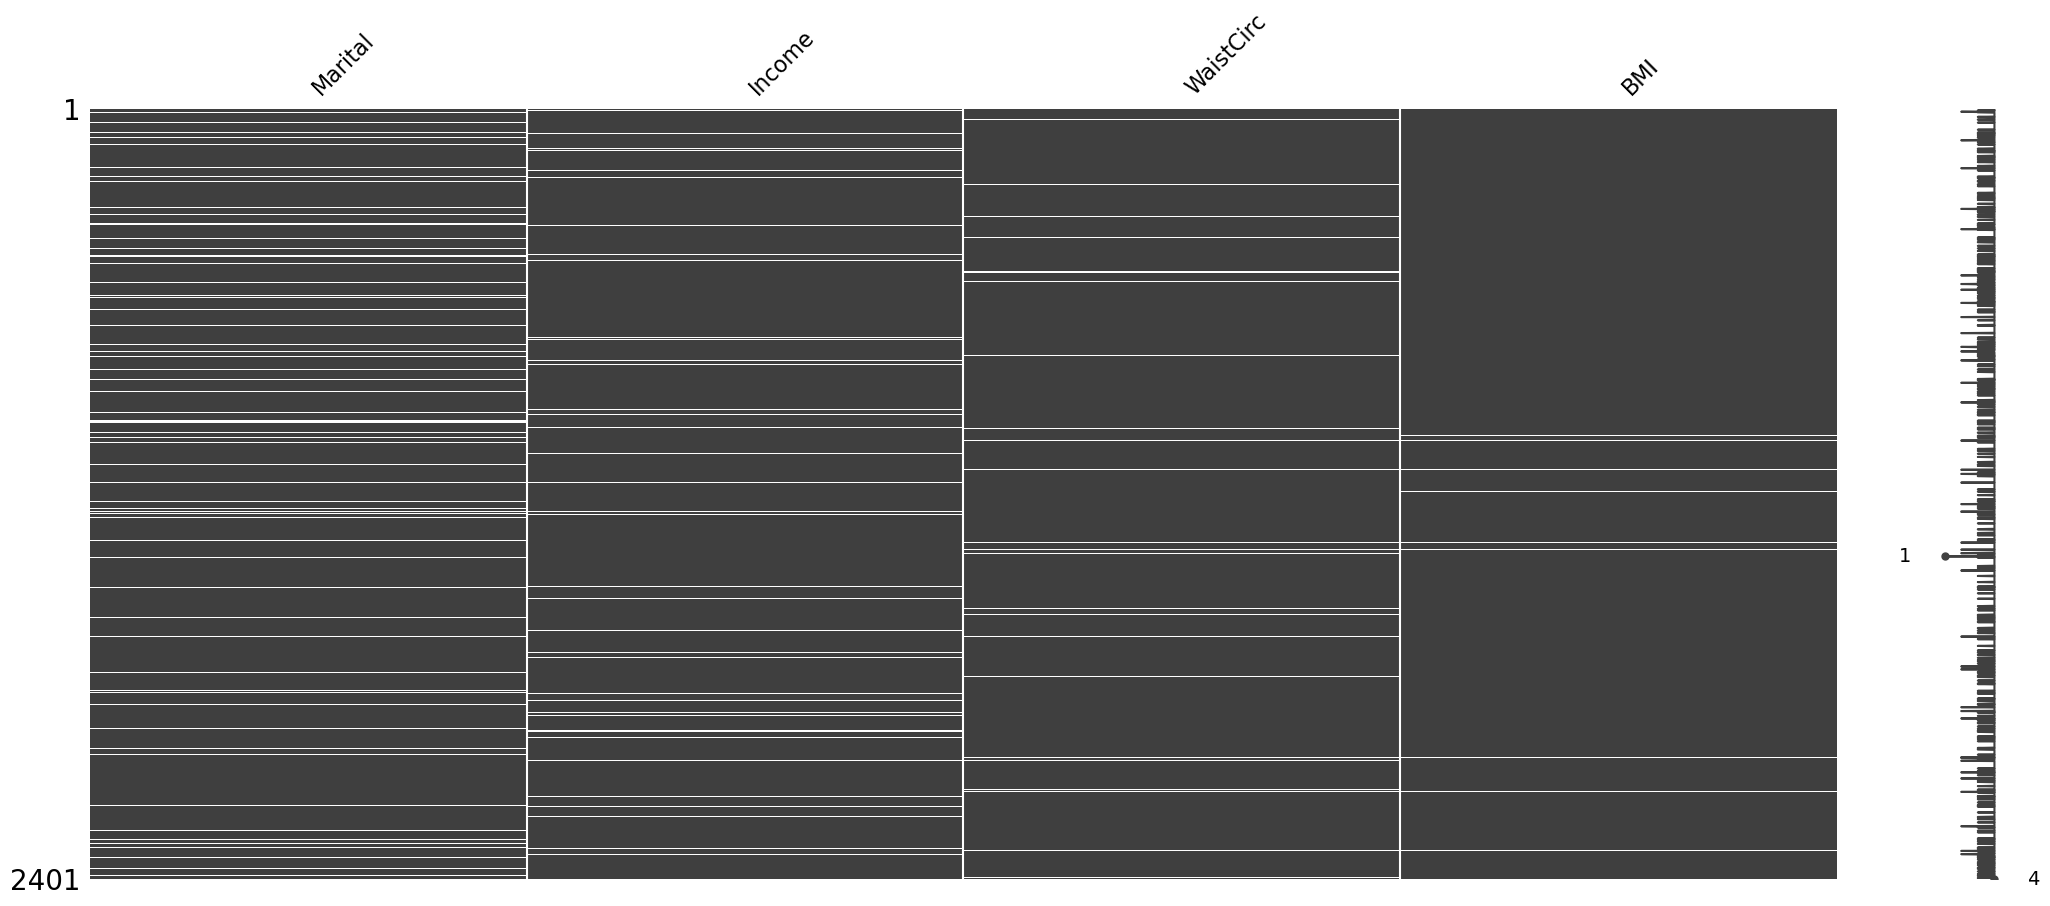

In [17]:
missingno.matrix(eda_ml[['Marital','Income','WaistCirc','BMI']]);

- Will address missing values after the validation split to prevent data leakage

In [18]:
# Display desriptive statitistics for all categortical columns
eda_ml.describe(include='object')

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


In [19]:
# Display desriptive statitistics for all numerical columns
eda_ml.describe(include='number')

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.0,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.25394,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.0,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.0,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.0,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.0,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.0,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [20]:
# Check target for null values
eda_ml['MetabolicSyndrome'].isna().sum()

0

### **Exploratory Visualizations**

### Custom Functions

In [21]:
# Updating function
def plot_categorical_vs_target(eda_ml, x, y, figsize=(6,4),
                            order = None, target_type='reg'):

  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=eda_ml, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot
    sns.stripplot(data=eda_ml, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)

  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=eda_ml, hue=y, x=x, stat='percent',  multiple='fill')

  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [22]:
# Get correlations
corr = eda_ml.corr(numeric_only = True)
corr.round(2)

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
Age,1.00,-0.01,0.23,0.08,0.23,0.12,0.15,0.24,0.08,0.07
Income,-0.01,1.00,-0.06,-0.08,-0.10,-0.05,0.01,-0.09,0.08,-0.04
WaistCirc,0.23,-0.06,1.00,0.91,0.12,0.05,0.36,0.26,-0.35,0.24
BMI,0.08,-0.08,0.91,1.00,0.08,0.04,0.27,0.21,-0.29,0.16
Albuminuria,0.23,-0.10,0.12,0.08,1.00,0.54,0.18,0.20,-0.02,0.11
UrAlbCr,0.12,-0.05,0.05,0.04,0.54,1.00,0.13,0.11,0.00,0.08
UricAcid,0.15,0.01,0.36,0.27,0.18,0.13,1.00,0.06,-0.25,0.21
BloodGlucose,0.24,-0.09,0.26,0.21,0.20,0.11,0.06,1.00,-0.21,0.27
HDL,0.08,0.08,-0.35,-0.29,-0.02,0.00,-0.25,-0.21,1.00,-0.39
Triglycerides,0.07,-0.04,0.24,0.16,0.11,0.08,0.21,0.27,-0.39,1.00


<Axes: >

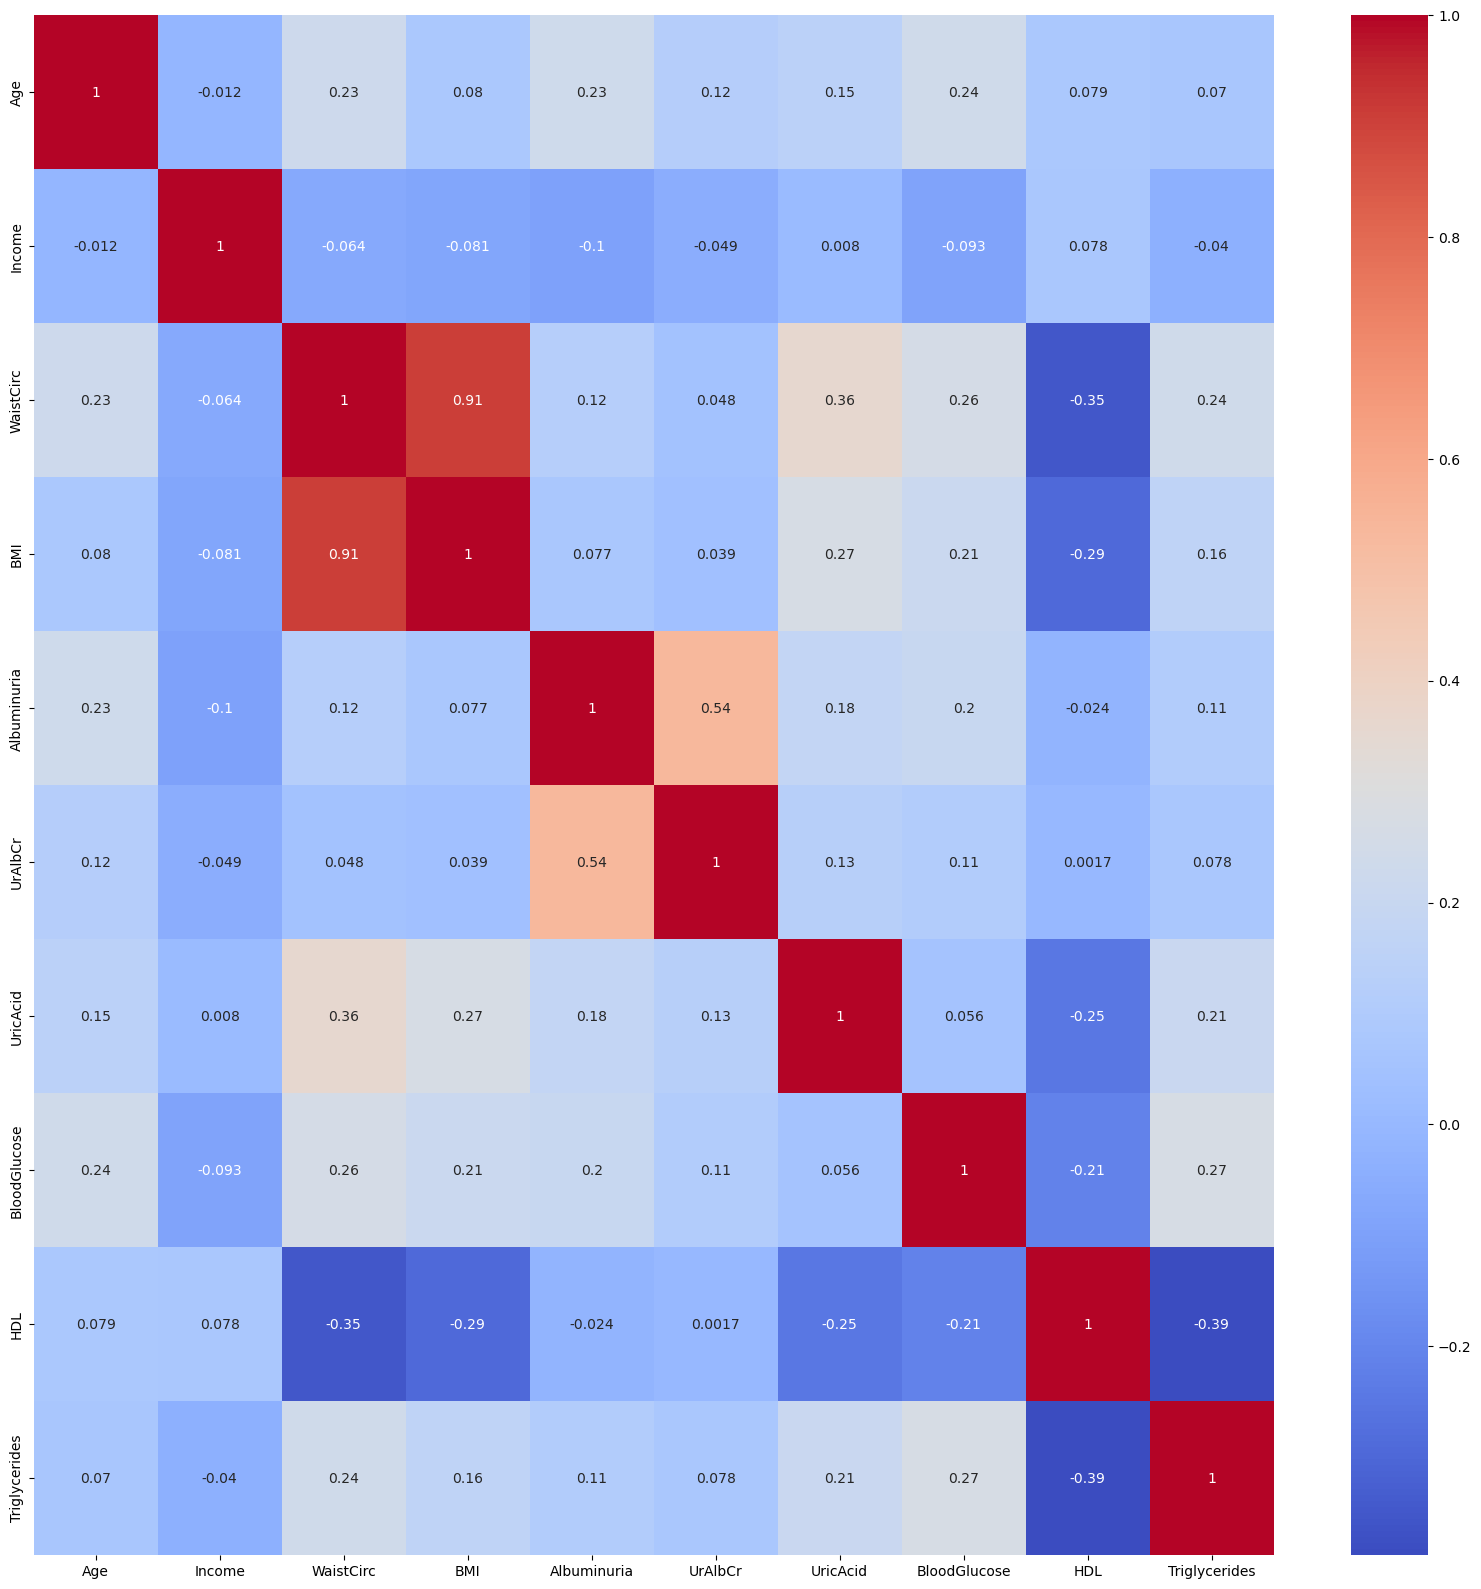

In [23]:
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax)

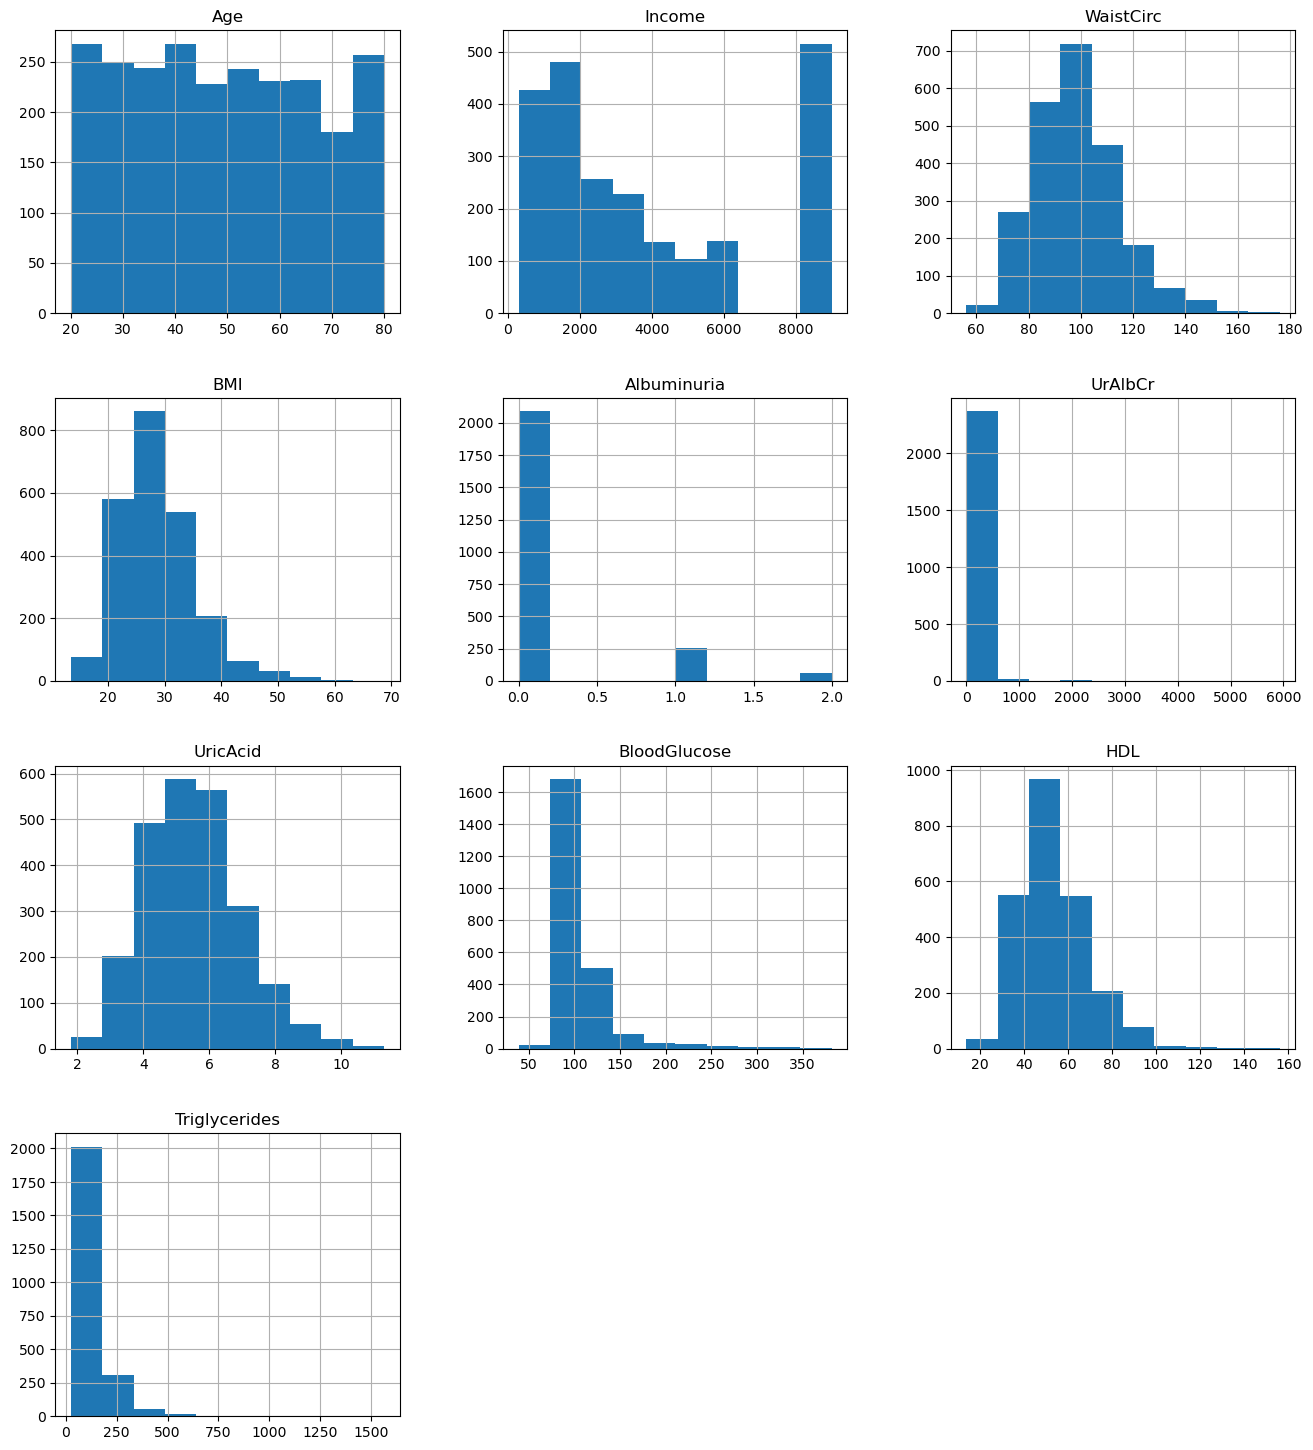

In [24]:
eda_ml.hist(figsize=(16,18));

Sex count plot 



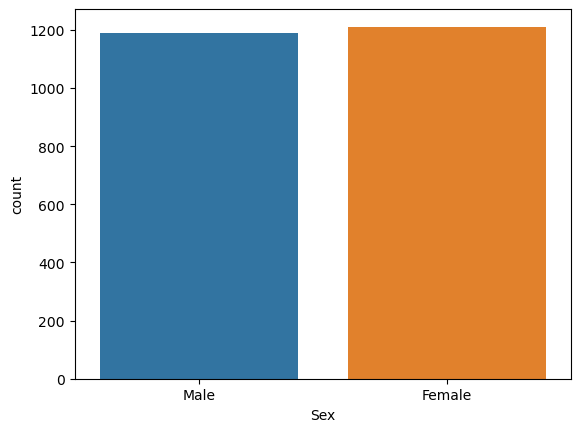

Marital count plot 



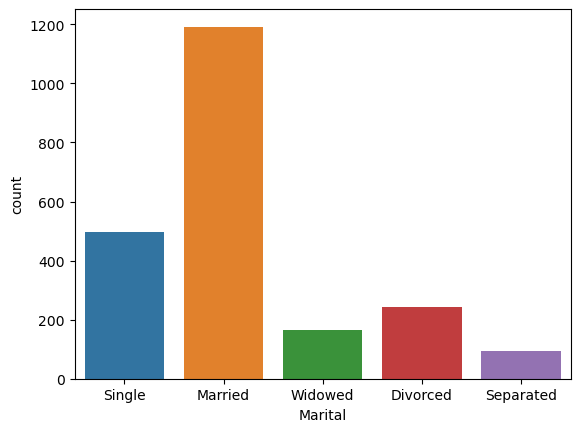

Race count plot 



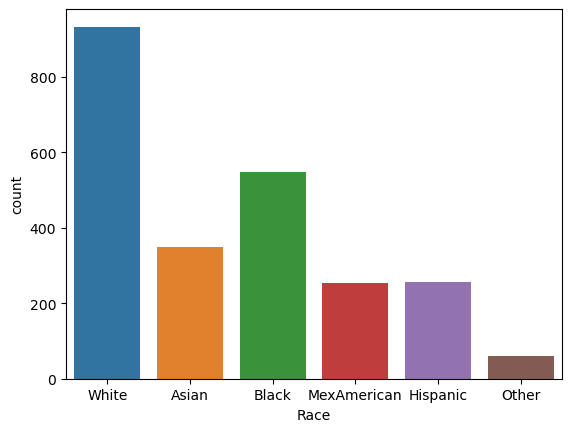

MetabolicSyndrome count plot 



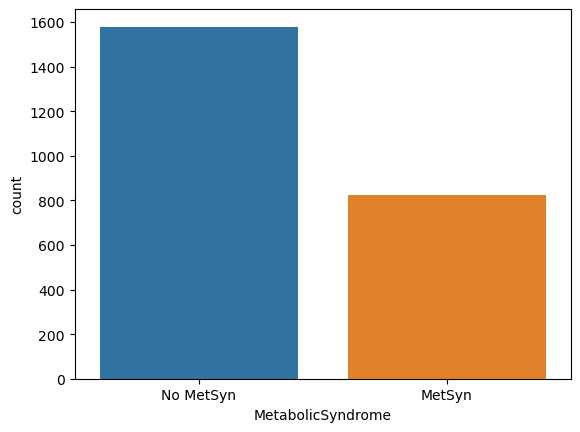

In [25]:
for col in eda_ml.select_dtypes('object').columns:
    print(col +' count plot \n')
    sns.countplot(x =col, data =eda_ml)
    plt.show()

### Split the Data (Validation Split)

#### Check Class Balance

In [26]:
# Check how many samples of each class are present
eda_ml['MetabolicSyndrome'].value_counts(normalize=False)

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

In [27]:
# Check how many samples of each class are present
eda_ml['MetabolicSyndrome'].value_counts(normalize=True)

No MetSyn    0.657643
MetSyn       0.342357
Name: MetabolicSyndrome, dtype: float64

- Will address class imbalance after train test split

In [28]:
# Split X and y, we are predicting Metaboic Syndrome
target = 'MetabolicSyndrome'
X = eda_ml.drop(columns=[target]).copy()
y = eda_ml[target].copy()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [29]:
# Check for class balance of target
y_train.value_counts(1)

No MetSyn    0.657778
MetSyn       0.342222
Name: MetabolicSyndrome, dtype: float64

In [30]:
X_train.shape

(1800, 13)

In [31]:
X_test.shape

(601, 13)

In [32]:
X_train.dtypes

Age                int64
Sex               object
Marital           object
Income             Int64
Race              object
WaistCirc        float64
BMI              float64
Albuminuria        int64
UrAlbCr          float64
UricAcid         float64
BloodGlucose       int64
HDL                int64
Triglycerides      int64
dtype: object

### Preprocessing for Machine Learning

#### Scale data and impute missing values

##### Numeric

In [33]:
cat_cols = ['Sex', 'Marital','Race']
num_cols = ['Age', 'Income','WaistCirc','BMI','Albuminuria','UrAlbCr','UricAcid','BloodGlucose','HDL','Triglycerides']

In [34]:
# Categorical Pipeline / Tuple
# Using value 'Undisclosed' to fill in null values (all in 'Marital')
impute_missing = SimpleImputer(strategy='constant',fill_value='Missing')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

nom_pipe = make_pipeline(impute_missing, ohe_encoder, scaler)
nom_pipe

# Nominal Tuple
nom_tuple = ('categorical', nom_pipe, cat_cols)

nom_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='Missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                 ('standardscaler', StandardScaler())]),
 ['Sex', 'Marital', 'Race'])

In [35]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
print("Numeric Columns:", num_cols)

# Transformers
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(median_imputer, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns: ['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 ['Age',
  'Income',
  'WaistCirc',
  'BMI',
  'Albuminuria',
  'UrAlbCr',
  'UricAcid',
  'BloodGlucose',
  'HDL',
  'Triglycerides'])

I chose the median for the  features  as I felt that this would represent the missing values the best in the data set.

In [36]:
# Create the preprocessor using make_column_transformer
preprocessor = ColumnTransformer([num_tuple, nom_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Income', 'WaistCirc', 'BMI',
                                  'Albuminuria', 'UrAlbCr', 'UricAcid',
                                  'BloodGlucose', 'HDL', 'Triglycerides']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Sex', 'Marital', 'Race'])],
                  verbose_feature_names_out=False)

In [37]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Age', 'Income', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr',
       'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'Sex_Female',
       'Sex_Male', 'Marital_Divorced', 'Marital_Married',
       'Marital_Missing', 'Marital_Separated', 'Marital_Single',
       'Marital_Widowed', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_MexAmerican', 'Race_Other', 'Race_White'], dtype=object)

In [38]:
X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,,
69151,0.479889,1.730039,-0.154930,-0.354167,-0.369369,-0.151810,-0.465579,0.215100,0.615647,-0.589530,-1.015678,1.015678,-0.335387,0.996672,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
70567,1.789367,-0.840768,0.210650,-0.536823,1.988308,0.035267,0.783160,-0.426943,-0.824293,-0.047159,-1.015678,1.015678,-0.335387,0.996672,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
64333,-0.146383,-0.669381,-0.741118,-0.338945,-0.369369,-0.158786,-1.159324,-0.175709,0.353840,0.517349,-1.015678,1.015678,2.981629,-1.003339,-0.299313,-0.208514,-0.509531,-0.268452,2.396158,-0.550821,-0.352558,-0.334361,-0.15644,-0.789357
68115,1.789367,-0.669381,-0.835665,-0.445495,-0.369369,-0.051190,1.199407,0.550078,0.092033,-0.091434,0.984564,-0.984564,-0.335387,-1.003339,-0.299313,-0.208514,-0.509531,3.725055,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
67719,-0.772656,1.455819,-0.993242,-0.612929,4.345986,2.238468,1.130032,-1.934347,1.008358,-0.157847,-1.015678,1.015678,-0.335387,0.996672,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,1.815473,-0.352558,-0.334361,-0.15644,-0.789357


In [39]:
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,,
71097,-1.569729,-1.252097,-1.440762,-0.749921,-0.369369,-0.111308,-0.743077,-0.454858,0.419292,-0.545254,-1.015678,1.015678,-0.335387,-1.003339,-0.299313,-0.208514,1.962588,-0.268452,-0.417335,1.815473,-0.352558,-0.334361,-0.15644,-0.789357
63684,0.309088,-0.155220,0.109800,0.026367,-0.369369,-0.114944,-0.118707,-0.008219,0.288388,-0.523117,0.984564,-0.984564,2.981629,-1.003339,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,1.815473,-0.352558,-0.334361,-0.15644,-0.789357
67939,1.333897,1.730039,-0.287295,-0.597708,-0.369369,-0.158786,-0.604328,0.270930,2.513749,-0.246397,-1.015678,1.015678,-0.335387,0.996672,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
67195,0.024418,0.496051,0.248468,0.148137,-0.369369,-0.153248,-0.188082,-0.371113,-0.235226,-0.700217,-1.015678,1.015678,-0.335387,0.996672,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
70058,-0.601854,-0.155220,-1.465975,-1.191340,-0.369369,-0.154431,0.158790,-0.036134,0.222936,-0.556323,-1.015678,1.015678,-0.335387,0.996672,-0.299313,-0.208514,-0.509531,-0.268452,2.396158,-0.550821,-0.352558,-0.334361,-0.15644,-0.789357


In [40]:
## confirm the first 3 rows index in y_test matches X_test_tf
y_test.head()

seqn
71097    No MetSyn
63684       MetSyn
67939    No MetSyn
67195    No MetSyn
70058    No MetSyn
Name: MetabolicSyndrome, dtype: object

### **Model the Data**

#### Create a baseline model for comparison

#### Import Libraries and Custom Functions

In [41]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Classification Metrics
from sklearn.metrics import (ConfusionMatrixDisplay,
                             PrecisionRecallDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

In [42]:
def classification_metrics(y_true, y_pred, label='Metabolic Syndrome',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                         label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                        output_dict=True,figsize=figsize,
                                        colorbar=colorbar, cmap=cmap_test,
                                        label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [43]:
# Define RanFor model pipeline
X_train_rf = preprocessor.fit_transform(X_train)
X_test_rf = preprocessor.transform(X_test)

# Create an instance of the model
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_tf, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       616
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



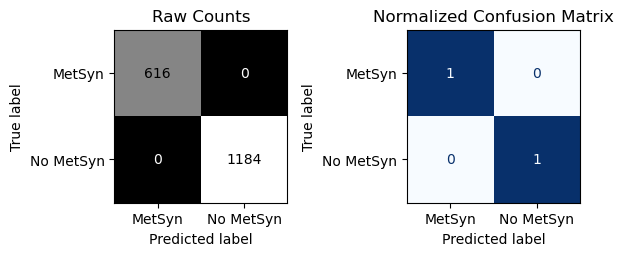


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.80      0.82      0.81       206
   No MetSyn       0.91      0.89      0.90       395

    accuracy                           0.87       601
   macro avg       0.85      0.86      0.85       601
weighted avg       0.87      0.87      0.87       601



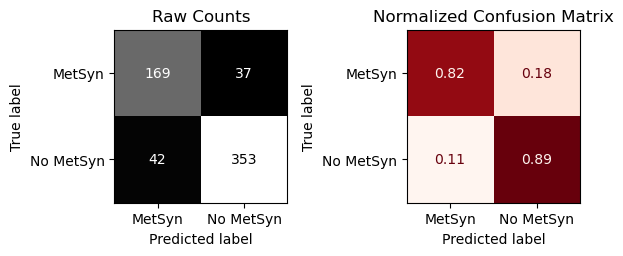

In [44]:
evaluate_classification(rfc, X_train_rf, y_train, X_test_rf, y_test)

#### Addressing class imbalance with Random Oversampling
- I'm using this approach because the classes are not extremely imbalanced and adding a few duplicates to further emphasize any heavily wieghted features can be important when predicting disease.

In [45]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler()
X_train_ov, y_train_ov = over_sampler.fit_resample(X_train_tf, y_train)
y_train_ov.value_counts()

No MetSyn    1184
MetSyn       1184
Name: MetabolicSyndrome, dtype: int64

In [46]:
# Create an instance of the model
rfc_over = RandomForestClassifier(random_state = 42)
rfc_over.fit(X_train_ov, y_train_ov)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1184
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      2368
   macro avg       1.00      1.00      1.00      2368
weighted avg       1.00      1.00      1.00      2368



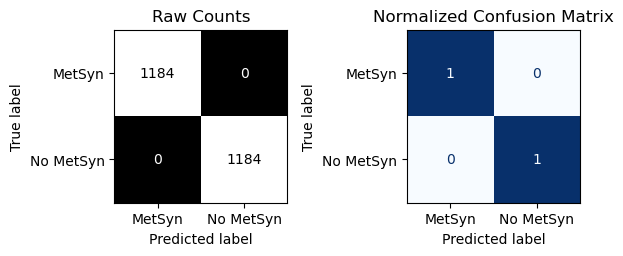


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.77      0.85      0.81       206
   No MetSyn       0.92      0.87      0.89       395

    accuracy                           0.86       601
   macro avg       0.84      0.86      0.85       601
weighted avg       0.87      0.86      0.86       601



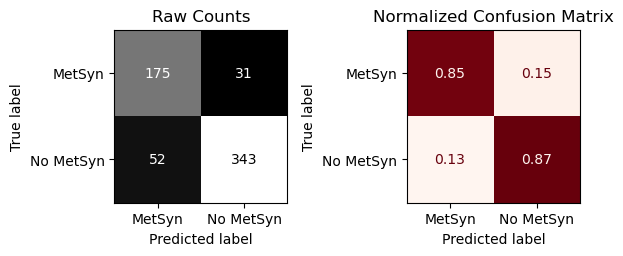

In [47]:
evaluate_classification(rfc_over, X_train_ov, y_train_ov, X_test_tf, y_test)

- Using Random Oversampling did not improve our model significantly in any area. Reducing the amount of false negatives would be the goal and the numbers is slightly increased in the oversampled model.

#### Classification Metrics of Chosen Model

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       616
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



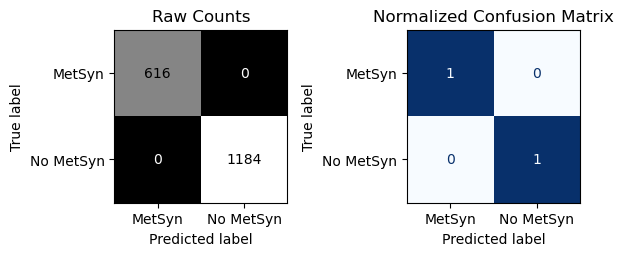


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.80      0.82      0.81       206
   No MetSyn       0.91      0.89      0.90       395

    accuracy                           0.87       601
   macro avg       0.85      0.86      0.85       601
weighted avg       0.87      0.87      0.87       601



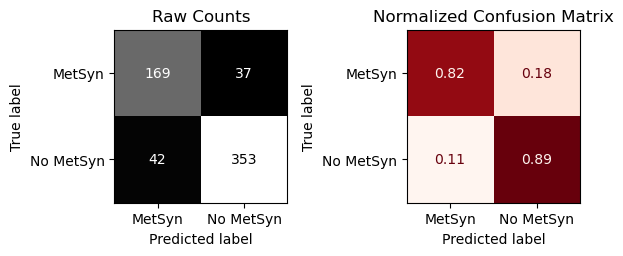

In [48]:
evaluate_classification(rfc, X_train_rf, y_train, X_test_rf, y_test)

### **Top 10 Permutation Importances**

In [49]:
from sklearn.inspection import permutation_importance

In [50]:
# Obtain feature importances from the fit model
rfc.feature_importances_

array([0.05705951, 0.02981771, 0.15808445, 0.09833228, 0.00767694,
       0.05364249, 0.04836489, 0.18320025, 0.11305242, 0.16617058,
       0.01440162, 0.01274827, 0.0061246 , 0.00596222, 0.00331559,
       0.00273159, 0.00598037, 0.00417212, 0.00495564, 0.00687174,
       0.00492539, 0.00374509, 0.00201433, 0.00664991])

In [51]:
# Checking the number of feature importances matches the # of columns
print(len(rfc.feature_importances_))
print(len(X_train_tf.columns))
len(rfc.feature_importances_) == len(X_train_tf.columns)

24
24


True

In [52]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [53]:
importances = get_importances(rfc,sort=True,ascending=False)
importances

BloodGlucose         0.183200
Triglycerides        0.166171
WaistCirc            0.158084
HDL                  0.113052
BMI                  0.098332
Age                  0.057060
UrAlbCr              0.053642
UricAcid             0.048365
Income               0.029818
Sex_Female           0.014402
Sex_Male             0.012748
Albuminuria          0.007677
Race_Black           0.006872
Race_White           0.006650
Marital_Divorced     0.006125
Marital_Single       0.005980
Marital_Married      0.005962
Race_Asian           0.004956
Race_Hispanic        0.004925
Marital_Widowed      0.004172
Race_MexAmerican     0.003745
Marital_Missing      0.003316
Marital_Separated    0.002732
Race_Other           0.002014
Name: Feature Importance, dtype: float64

In [54]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

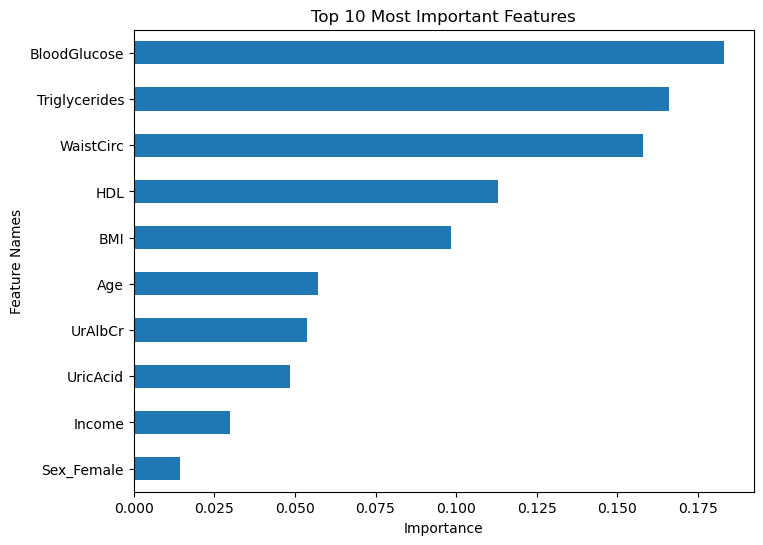

In [55]:
# testing our function
importances = get_importances(rfc,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=10);

In [56]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rfc, X_test_tf, y_test,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [57]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_tf.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

BloodGlucose         0.060899
Triglycerides        0.053910
WaistCirc            0.020965
HDL                  0.014309
Sex_Female           0.010316
Race_MexAmerican     0.004659
Sex_Male             0.003661
UrAlbCr              0.002995
Race_Asian           0.002329
Race_Hispanic        0.000998
Race_Other           0.000333
Marital_Widowed      0.000333
Marital_Separated   -0.000333
Income              -0.000666
Marital_Missing     -0.000666
Marital_Divorced    -0.000666
Albuminuria         -0.000998
UricAcid            -0.002995
Race_Black          -0.003661
Marital_Married     -0.003993
BMI                 -0.004326
Marital_Single      -0.004659
Race_White          -0.005324
Age                 -0.009983
Name: permutation importance, dtype: float64

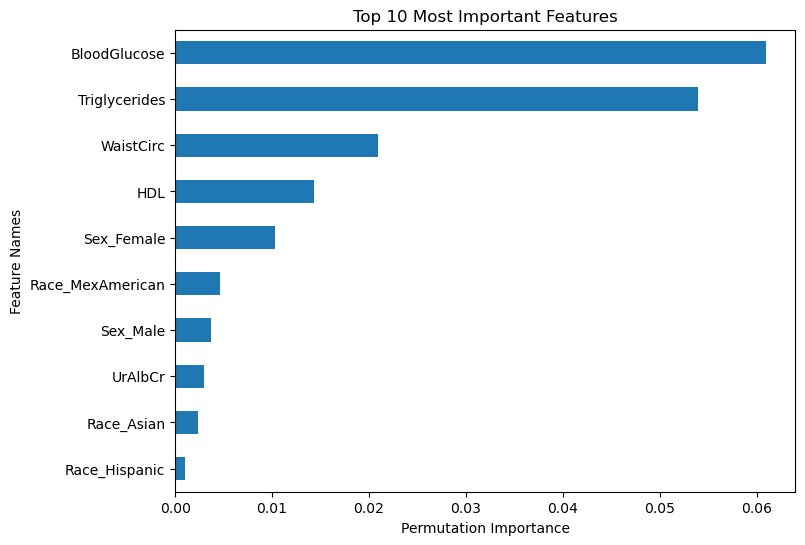

In [58]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

In [59]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [60]:
colors_top7 = get_color_dict(importances, top_n=7)
colors_top7

{'BloodGlucose': 'green',
 'Triglycerides': 'green',
 'WaistCirc': 'green',
 'HDL': 'green',
 'BMI': 'green',
 'Age': 'green',
 'UrAlbCr': 'green',
 'UricAcid': '#006ba4',
 'Income': '#006ba4',
 'Sex_Female': '#006ba4',
 'Sex_Male': '#006ba4',
 'Albuminuria': '#006ba4',
 'Race_Black': '#006ba4',
 'Race_White': '#006ba4',
 'Marital_Divorced': '#006ba4',
 'Marital_Single': '#006ba4',
 'Marital_Married': '#006ba4',
 'Race_Asian': '#006ba4',
 'Race_Hispanic': '#006ba4',
 'Marital_Widowed': '#006ba4',
 'Race_MexAmerican': '#006ba4',
 'Marital_Missing': '#006ba4',
 'Marital_Separated': '#006ba4',
 'Race_Other': '#006ba4'}

In [61]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

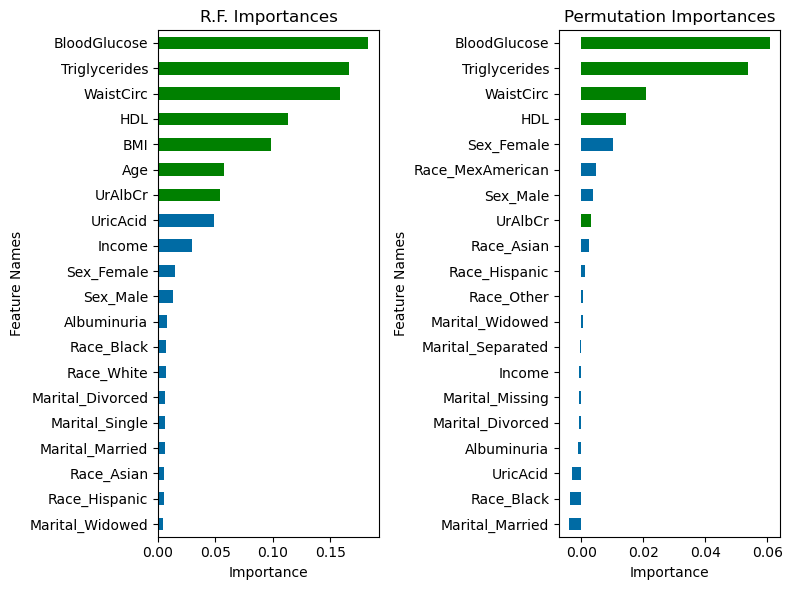

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
n = 20 # setting the # of features to use for both subplots
plot_importance_color_ax(importances, top_n=n, ax=axes[0],
                         color_dict= colors_top7)
plot_importance_color_ax(permutation_importances, top_n=n, ax=axes[1],
                         color_dict=colors_top7)
axes[0].set(title='R.F. Importances')
axes[1].set(title='Permutation Importances')
fig.tight_layout()

Blood Glucose, Triglycerides are the top two features that influence the occurence of Metabolic Syndrome in this data set. With this being a medical data set and Metabolic Syndrome being heavily influenced by diet and lifestyle it stands to reason that the next important feature would be waist circumference. HDL being 'good' cholesterol makes sense to be high on the important features list even though we don't know in what direction it influences the model. These make up more than 50% of the feature importance.

### Create Explanatory Visualizations for the most important features
- Blood Glucose
- Triglycerides

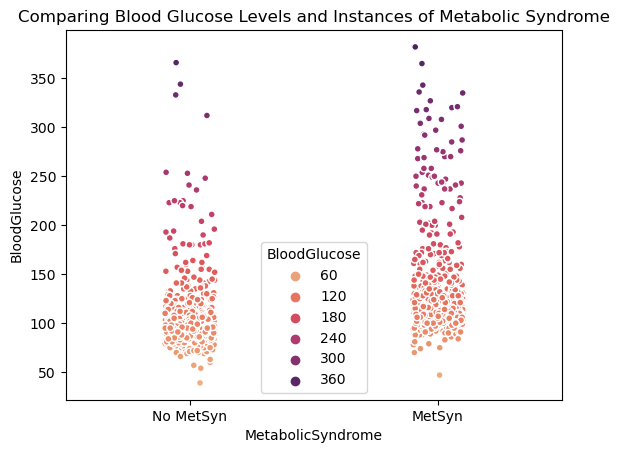

In [63]:
sns.stripplot(data=eda_ml, x='MetabolicSyndrome',y='BloodGlucose', hue='BloodGlucose', palette='flare', edgecolor='white', linewidth=1).set(title="Comparing Blood Glucose Levels and Instances of Metabolic Syndrome");

This visualization shows the higher the Blood Glucose level especially around the the 120 marker the higher the chance of being diagnosed with Metabolic Syndrome.

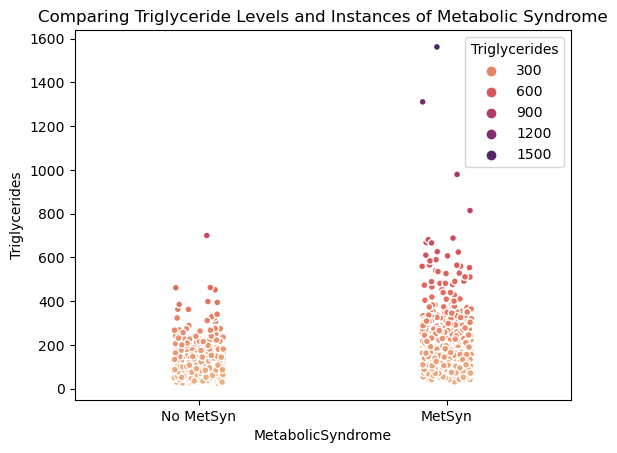

In [64]:
sns.stripplot(data=eda_ml, x='MetabolicSyndrome',y='Triglycerides', hue='Triglycerides', palette='flare', edgecolor='white', linewidth=1).set(title="Comparing Triglyceride Levels and Instances of Metabolic Syndrome");

This image shows that the when the Triglyceride levels reach 300 there is an increased risk of contracting Metabolic Syndrome

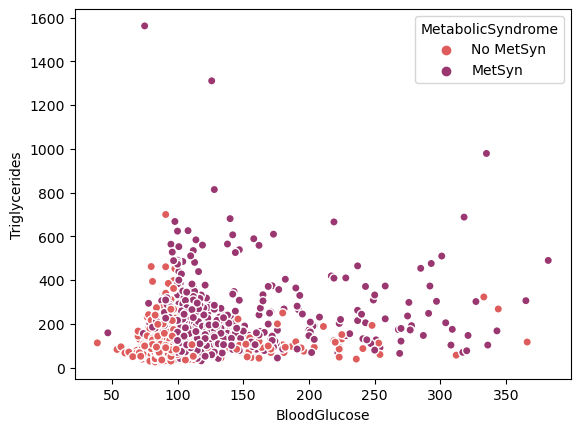

In [65]:
sns.scatterplot(data=eda_ml, x='BloodGlucose',y='Triglycerides', hue='MetabolicSyndrome', palette='flare', edgecolor='white', linewidth=1);

In [66]:
scatter_kws = dict(edgecolor='white')

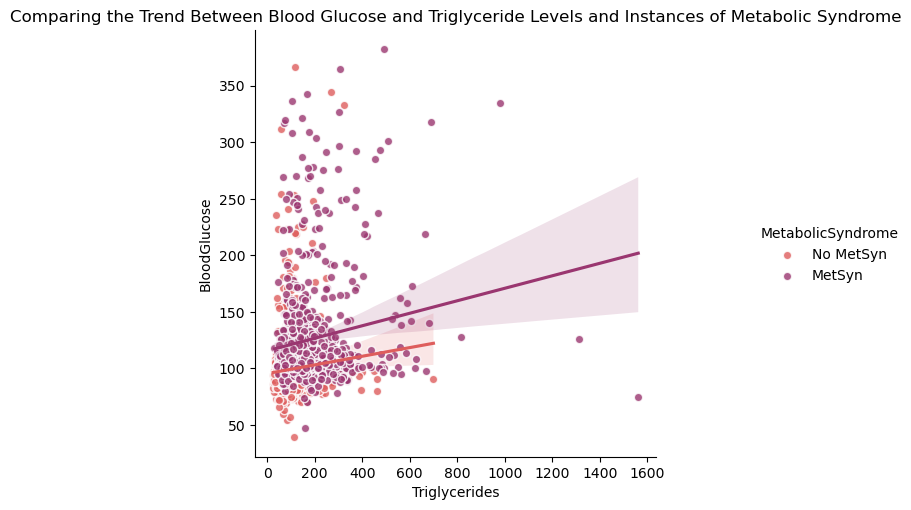

In [67]:
g = sns.lmplot(data=eda_ml, x="Triglycerides", y="BloodGlucose",
               palette='flare', scatter_kws=scatter_kws,
                hue="MetabolicSyndrome");
g.ax.set_title("Comparing the Trend Between Blood Glucose and Triglyceride Levels and Instances of Metabolic Syndrome");

Here you can clearly see that instances of Metabolic Syndrome increase significantly when a person's Blood Glucose Levels reach 100 and their Triglycerides reach 100 as well. Blood Glucose is the most significant feature.

## **Part Two**

### Import Libraries

In [68]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE

### Model and Tranform a KNeighbors Model with PCA

#### Transform with PCA

In [69]:
pca = PCA(n_components=.85)

In [70]:
pca_rf = make_pipeline(preprocessor, pca)

### **Fit and evaluate a model using your new features and compare it to your model from Part 1**

In [71]:
X_train_pca = pca_rf.fit_transform(X_train)
X_test_pca = pca_rf.transform(X_test)

In [72]:
rfc_pca = RandomForestClassifier(random_state = 42)
rfc_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       616
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



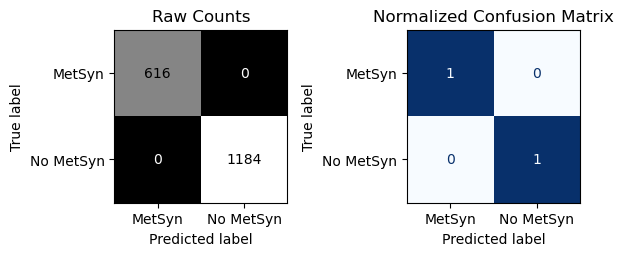


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.74      0.77      0.75       206
   No MetSyn       0.88      0.86      0.87       395

    accuracy                           0.83       601
   macro avg       0.81      0.81      0.81       601
weighted avg       0.83      0.83      0.83       601



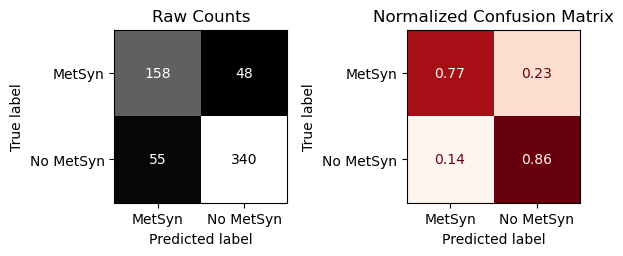

In [73]:
evaluate_classification(rfc_pca, X_train_pca, y_train,
                 X_test_pca, y_test)

Using PCA has created a model where the accuracy decresed from 90% to 81%

### **Using a Wrapper Method for Feature Selection**

In [74]:
from sklearn.feature_selection import SequentialFeatureSelector
rfw = RandomForestClassifier(random_state = 42)

In [75]:
X_train_f = preprocessor.fit_transform(X_train)
X_test_f = preprocessor.transform(X_test)

In [76]:
y.value_counts()

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm,y_train_sm = smote.fit_resample(X_train_f, y_train)
y_train_sm.value_counts()

No MetSyn    1184
MetSyn       1184
Name: MetabolicSyndrome, dtype: int64

In [78]:
# Instantiate the SequentialFeatureSelector
sk_sfs = SequentialFeatureSelector(rfw, n_features_to_select=10,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sk_sfs.fit(X_train_sm,y_train_sm)

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=10, n_jobs=-1)

In [79]:
# Preview array of T/F for selected (or not) features
sk_sfs.support_[0:5]

array([ True, False,  True, False,  True])

In [80]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sk_sfs.support_
# Only include the features selected
X_train_10 = X_train_sm.loc[:,features_to_keep]
X_test_10 = X_test_f.loc[:,features_to_keep]
X_train_10.shape

(2368, 10)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00      1184
   No MetSyn       1.00      1.00      1.00      1184

    accuracy                           1.00      2368
   macro avg       1.00      1.00      1.00      2368
weighted avg       1.00      1.00      1.00      2368



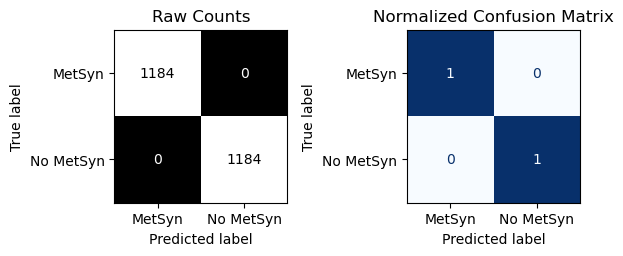


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.77      0.88      0.83       206
   No MetSyn       0.93      0.87      0.90       395

    accuracy                           0.87       601
   macro avg       0.85      0.87      0.86       601
weighted avg       0.88      0.87      0.87       601



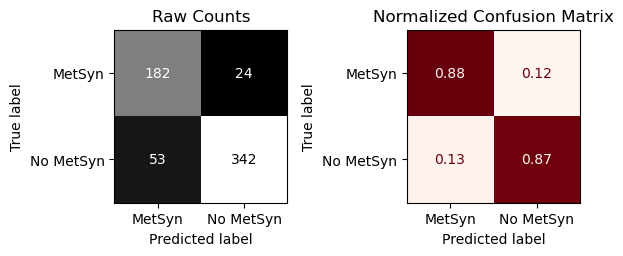

In [81]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=42)
# Fit on 10 selected featuers
rf_clf.fit(X_train_10, y_train_sm)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_10, y_train_sm, X_test_10, y_test)

In [82]:
## Calculate feature importances
importances2 = permutation_importance(rf_clf, X_test_10, y_test)

## Create a Series of Feature Importances
importances2 = pd.Series(importances2['importances_mean'], index=rf_clf.feature_names_in_)
importances2 = importances2.sort_values(ascending=False)
importances2.head(10)

BloodGlucose        0.082862
WaistCirc           0.064892
Triglycerides       0.045591
Sex_Female          0.031614
HDL                 0.030948
UrAlbCr             0.005324
Race_Black          0.005324
Albuminuria         0.002995
Age                 0.001331
Marital_Divorced    0.000666
dtype: float64

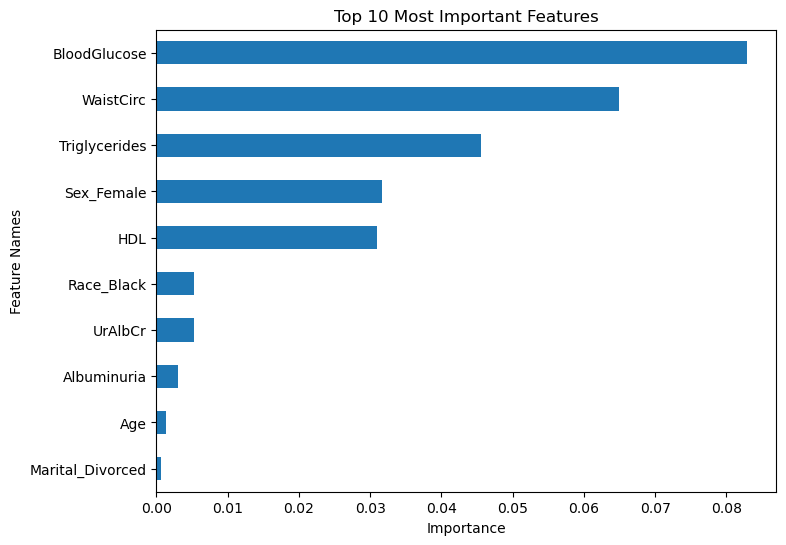

In [83]:
plot_importance(importances2,top_n=10);

- One thing I noticed is that more demographical information is important in this model vs. the first model's permutation importance was more focused on medical numbers and information.
- Blood Glucose, triglycerides and waist circumference remain the top 3 features in every model even if the orders are not the same. BMI is not indicated here at all.

## **Part Three**

### Import Libraries

In [84]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import MinMaxScaler
tf.keras.optimizers.legacy.Adam()
rmse = RootMeanSquaredError()

# This is used to overcome an issue with setting up tensorflow in M1/M1
# Suspect tensorflow-macos not very fit with GPU, use CPU only with
tf.config.set_visible_devices([], 'GPU')

# Set random seeds for consistent outcomes
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### Custom Functions

In [85]:
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            order = None, target_type='reg'):

  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot
    sns.stripplot(data=df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)

  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=df, hue=y, x=x, stat='percent',  multiple='fill')

  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [86]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes



In [87]:
def eval_classification(true, pred, name, labels=None):
    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""

    print(name, '\n')
    print(classification_report(true, pred, target_names=labels))
    ConfusionMatrixDisplay.from_predictions(true, pred, display_labels=labels, )

    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

    return scores

#### **Task**

- Build a small neural network (with only 1 hidden layer)
  - Ensure the final layer is appropriate for your task (number of units and activation function).
  - Fit it for 50 epochs
    - Use the Early Stopping callback
      - Start with patience =5 monitoring val_accuracy.
    - Use a validation_split of .2
    - Save the history and visualize it.
  - Evaluate the model using sklearn evaluation metrics:
    - Confusion Matrix
    - Classification Report
    - You are welcome to use the custom evaluation functions

- Tune at least 3 parameters with the Keras tuner:
  - Include a dropout layer and adjust the dropout rate.
  - Number of Units
  - Optimizer
  - Learning rates
- Evaluate your best model on unseen test data

Keras does not accept strings as targets I will encode the target column berfore preceeding.

In [88]:
eda_ml['MetabolicSyndrome'].replace(['MetSyn','No MetSyn'],[1,0], inplace=True)
eda_ml.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
seqn,,,,,,,,,,,,,,
62161,22,Male,Single,8200,White,81.0,23.3,0,3.88,4.9,92,41,84,0
62164,44,Female,Married,4500,White,80.1,23.2,0,8.55,4.5,82,28,56,0
62169,21,Male,Single,800,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
62172,43,Female,Single,2000,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
62177,51,Male,Married,<NA>,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [89]:
# Split X and y, we are predicting Metaboic Syndrome
target = 'MetabolicSyndrome'
X = eda_ml.drop(columns=[target]).copy()
y = eda_ml[target].copy()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [90]:
# Proportions of 0 and 1 in the dataset
y.value_counts(normalize=True)

0    0.657643
1    0.342357
Name: MetabolicSyndrome, dtype: float64

In [91]:
# fit the data
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)
X_train_nn.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,Sex_Female,Sex_Male,Marital_Divorced,Marital_Married,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,,,,
67675,1.013097,0.200037,-0.160267,-0.666293,-0.365911,-0.088157,-0.769430,-0.254298,0.933237,-0.151196,-1.017939,1.017939,-0.351562,1.015678,-0.304789,-0.201153,-0.519031,-0.256358,-0.417335,-0.530225,-0.342518,2.885555,-0.160128,-0.808018
65978,0.495836,-0.486655,1.172264,0.851462,2.011850,-0.019433,1.059383,0.218478,-1.423044,0.189057,-1.017939,1.017939,-0.351562,-0.984564,-0.304789,-0.201153,1.926666,-0.256358,-0.417335,-0.530225,-0.342518,-0.346554,-0.160128,1.237597
68502,-1.228367,-0.795667,0.043314,0.024962,-0.365911,-0.160450,0.567010,-0.697525,-0.682499,-0.481441,-1.017939,1.017939,-0.351562,-0.984564,-0.304789,-0.201153,1.926666,-0.256358,-0.417335,1.885991,-0.342518,-0.346554,-0.160128,-0.808018
62397,1.242991,-0.830001,1.659625,1.783153,-0.365911,-0.149655,-0.488074,1.075385,-0.547854,0.189057,0.982377,-0.982377,-0.351562,-0.984564,-0.304789,-0.201153,-0.519031,3.900797,-0.417335,-0.530225,-0.342518,2.885555,-0.160128,-0.808018
66594,0.725730,-1.001675,1.048881,0.731244,2.011850,-0.035924,-0.136379,1.400418,-1.086433,0.219079,-1.017939,1.017939,2.844452,-0.984564,-0.304789,-0.201153,-0.519031,-0.256358,-0.417335,-0.530225,-0.342518,2.885555,-0.160128,-0.808018


In [92]:
in_shape = X_train_nn.shape[1]
in_shape

24

### **Model 1**

In [93]:
# Build binary classification model within function
def build_model_1():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(24, input_dim =in_shape,
                          activation = 'relu'))


    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [94]:
# Call our build function to build model
n_model_1 = build_model_1()

# Get model summary
n_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                600       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [95]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [96]:
history1 = n_model_1.fit(X_train_nn, y_train,
                        validation_data = (X_test_nn, y_test),
                         validation_split = .2, epochs = 50,
                       callbacks = [early_stop])

Epoch 1/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6586 - accuracy: 0.5956 - precision: 0.4211 - recall: 0.4854 - val_loss: 0.5612 - val_accuracy: 0.7155 - val_precision: 0.6012 - val_recall: 0.5049
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7350 - precision: 0.6482 - recall: 0.4935 - val_loss: 0.4826 - val_accuracy: 0.7637 - val_precision: 0.6951 - val_recall: 0.5534
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7844 - precision: 0.7308 - recall: 0.5860 - val_loss: 0.4457 - val_accuracy: 0.8070 - val_precision: 0.7778 - val_recall: 0.6117
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8094 - precision: 0.7551 - recall: 0.6558 - val_loss: 0.4230 - val_accuracy: 0.8087 - val_precision: 0.7758 - val_recall: 0.6214
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8189 - precision: 

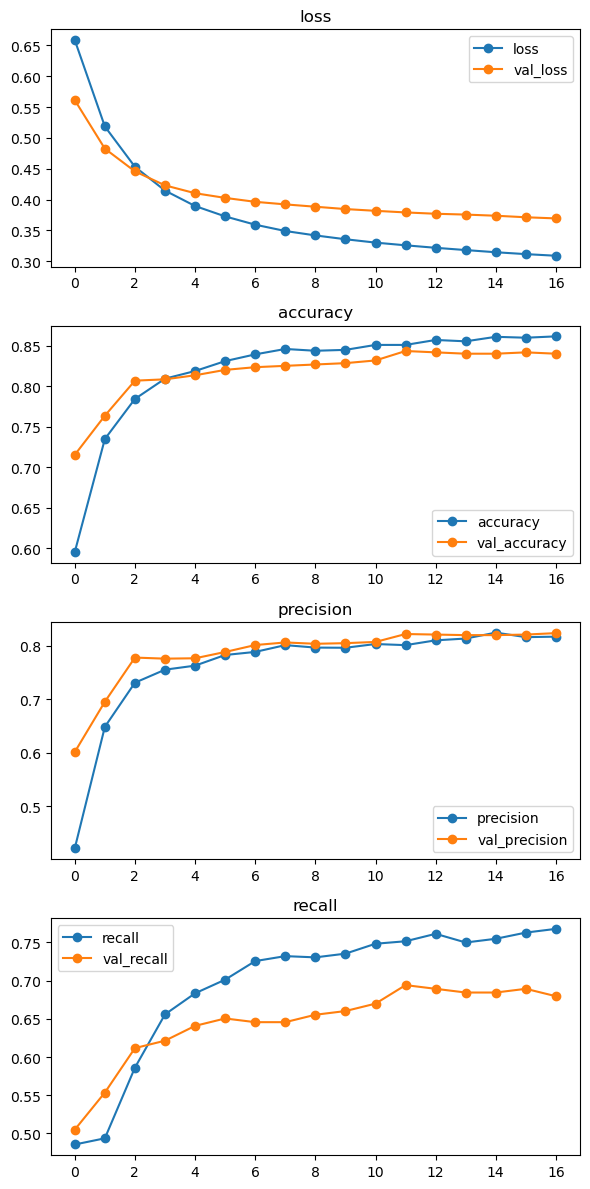

In [97]:
# plot learning history
plot_history(history1);

In [98]:
n_model_1.predict(X_train_nn)[:10]

57/57 [==============================] - 0s 1ms/step


array([[0.0190176 ],
       [0.9159352 ],
       [0.04593423],
       [0.97467625],
       [0.9327892 ],
       [0.10941618],
       [0.49624184],
       [0.00199163],
       [0.09013348],
       [0.02661937]], dtype=float32)

In [99]:
# Get predictions
train_pred_proba = n_model_1.predict(X_train_nn)
test_pred_proba = n_model_1.predict(X_test_nn)


# round predictions to integers instead of floats using np.rint()
train_preds = np.rint(train_pred_proba)
test_preds = np.rint(test_pred_proba)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

19/19 [==============================] - 0s 2ms/step
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]]


Model 1 Train 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.88      0.91      0.90      1184
   Metabolic Syndrome       0.82      0.77      0.79       616

             accuracy                           0.86      1800
            macro avg       0.85      0.84      0.85      1800
         weighted avg       0.86      0.86      0.86      1800



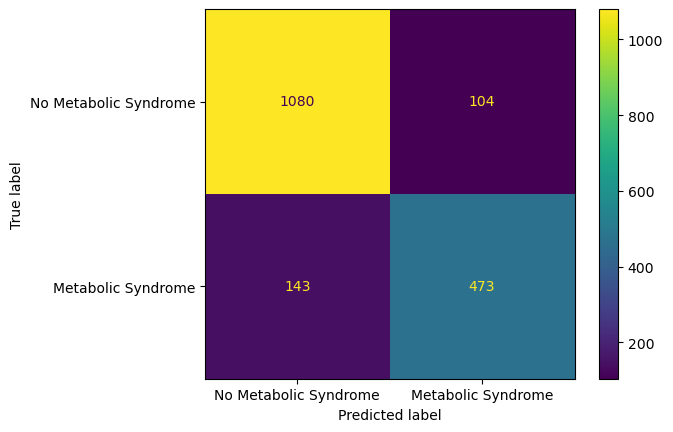

Model 1 Test 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.85      0.92      0.88       395
   Metabolic Syndrome       0.82      0.68      0.74       206

             accuracy                           0.84       601
            macro avg       0.84      0.80      0.81       601
         weighted avg       0.84      0.84      0.84       601



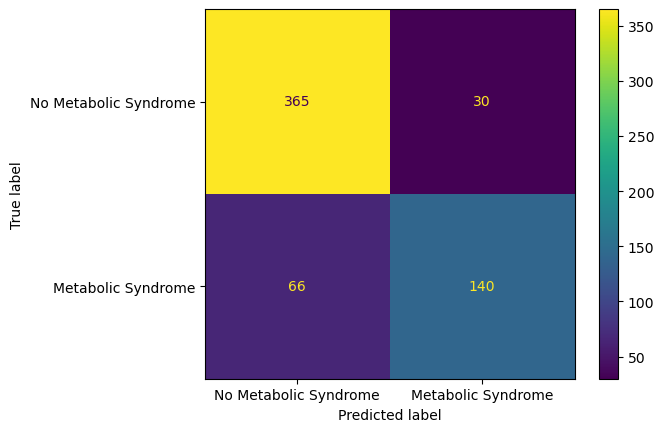

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
Model 1 Train,0.819757,0.767857,0.792959,0.862778
Model 1 Test,0.823529,0.679612,0.744681,0.840266


In [100]:
# Define labels for the confusion matrix
labels = ['No Metabolic Syndrome', 'Metabolic Syndrome']

train_scores = eval_classification(y_train, train_preds, labels=labels, name='Model 1 Train')
test_scores = eval_classification(y_test, test_preds, labels=labels, name='Model 1 Test')

scores = pd.concat([train_scores, test_scores])
scores

Model 2

adding a dropout layer of .12

In [101]:
# Build binary classification model within function
def build_model_2():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(24, input_dim =in_shape,
                          activation = 'relu'))
    model.add(Dropout(.12))

    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [102]:
# Call our build function to build model
n_model_2 = build_model_2()

# Get model summary
n_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [103]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [104]:
history2 = n_model_2.fit(X_train_nn, y_train,
                        validation_data = (X_test_nn, y_test),
                         validation_split = .2, epochs = 50, verbose=0,
                       callbacks = [early_stop])

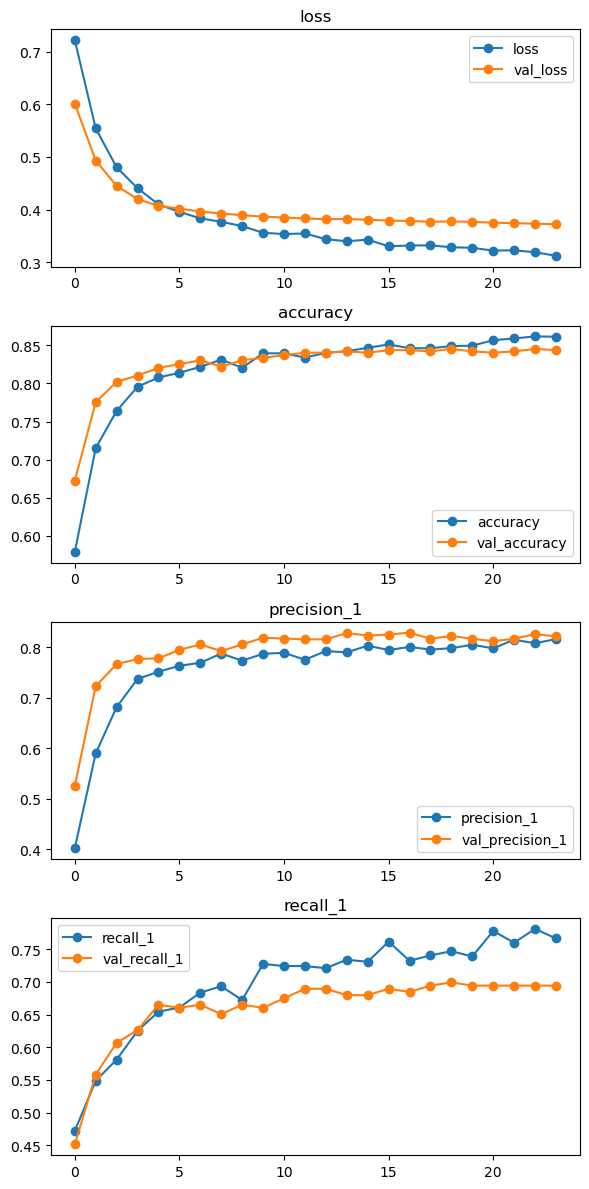

In [105]:
# plot learning history
plot_history(history2);

In [106]:
# Get predictions
train_pred_proba = n_model_2.predict(X_train_nn)
test_pred_proba = n_model_2.predict(X_test_nn)


# round predictions to integers instead of floats using np.rint()
train_preds = np.rint(train_pred_proba)
test_preds = np.rint(test_pred_proba)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

19/19 [==============================] - 0s 1ms/step
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]]


Model 2 Train 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.89      0.91      0.90      1184
   Metabolic Syndrome       0.82      0.78      0.80       616

             accuracy                           0.87      1800
            macro avg       0.85      0.84      0.85      1800
         weighted avg       0.86      0.87      0.86      1800



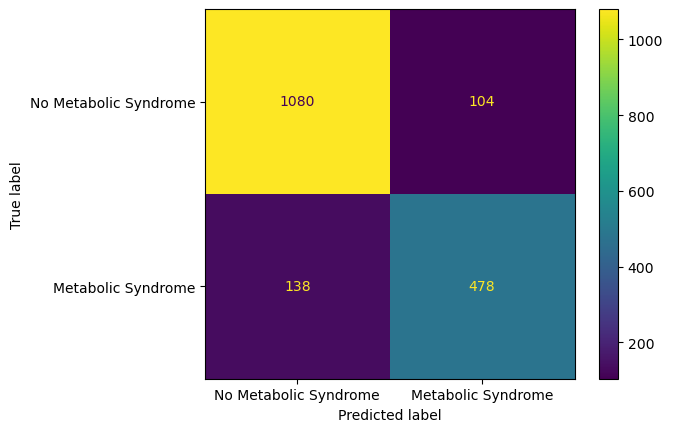

Model 2 Test 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.85      0.92      0.89       395
   Metabolic Syndrome       0.82      0.69      0.75       206

             accuracy                           0.84       601
            macro avg       0.84      0.81      0.82       601
         weighted avg       0.84      0.84      0.84       601



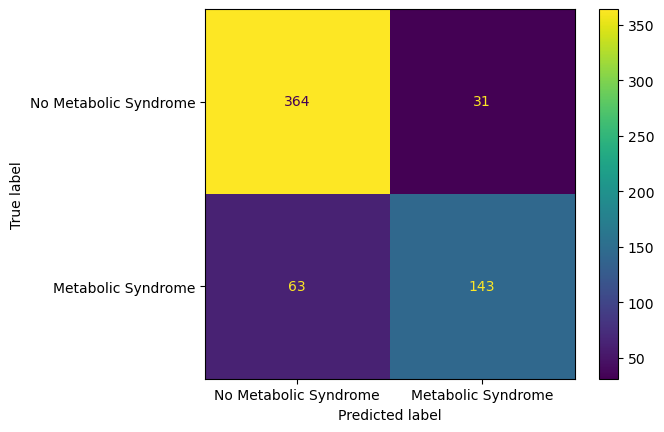

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
Model 1 Train,0.819757,0.767857,0.792959,0.862778
Model 1 Test,0.823529,0.679612,0.744681,0.840266
Model 2 Train,0.821306,0.775974,0.797997,0.865556
Model 2 Test,0.821839,0.694175,0.752632,0.843594


In [107]:
# Define labels for the confusion matrix
labels = ['No Metabolic Syndrome', 'Metabolic Syndrome']

train_scores = eval_classification(y_train, train_preds, labels=labels, name='Model 2 Train')
test_scores = eval_classification(y_test, test_preds, labels=labels, name='Model 2 Test')

scores = pd.concat([scores, pd.concat([train_scores, test_scores])])
scores

Including a dropout layer did not improve the model. Let's find out if we are using the best optimizer.

Model 3

In [108]:
import tensorflow as tf
from tensorflow import keras

In [109]:
!pip install -q -U keras-tuner

In [110]:
import keras_tuner as kt
from keras_tuner import HyperParameters as hp

In [111]:
# Build binary classification model within function
def build_model_3(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(24, input_dim =in_shape,
                          activation = 'relu'))
    model.add(Dropout(.12))

    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [112]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [113]:
# Define tuner object
tuner = kt.Hyperband(build_model_3,
                     objective='val_accuracy',
                     max_epochs=50,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Model_tuning')

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [115]:
# Run the tuner
epochs = 100
tuner.search(X_train_nn, y_train,  epochs=epochs, validation_split=0.2,
             validation_data = (X_test_nn, y_test), callbacks = [early_stop])

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.780366063117981

Best val_accuracy So Far: 0.80033278465271
Total elapsed time: 00h 00m 09s


In [116]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'optimizer': 'nadam',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 3,
 'tuner/round': 0}

In [117]:
# Obtain best model
tuned_model = tuner.get_best_models()[0]
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                600       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [118]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [119]:
history3 = tuned_model.fit(X_train_nn, y_train,
                        validation_data = (X_test_nn, y_test),
                         validation_split = .2, epochs = 50, verbose=0,
                       callbacks = [early_stop])

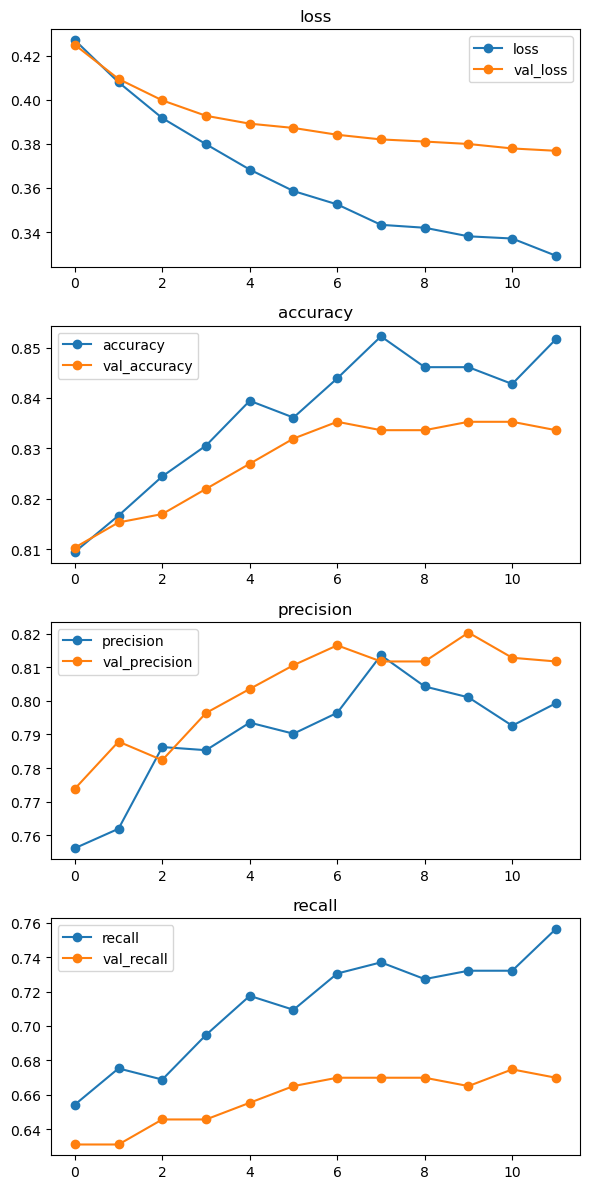

In [120]:
# plot learning history
plot_history(history3);

In [121]:
# Get predictions
train_pred_proba = tuned_model.predict(X_train_nn)
test_pred_proba = tuned_model.predict(X_test_nn)


# round predictions to integers instead of floats using np.rint()
train_preds = np.rint(train_pred_proba)
test_preds = np.rint(test_pred_proba)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

19/19 [==============================] - 0s 1ms/step
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]]


Model 3 Train 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.88      0.91      0.89      1184
   Metabolic Syndrome       0.81      0.77      0.79       616

             accuracy                           0.86      1800
            macro avg       0.85      0.84      0.84      1800
         weighted avg       0.86      0.86      0.86      1800



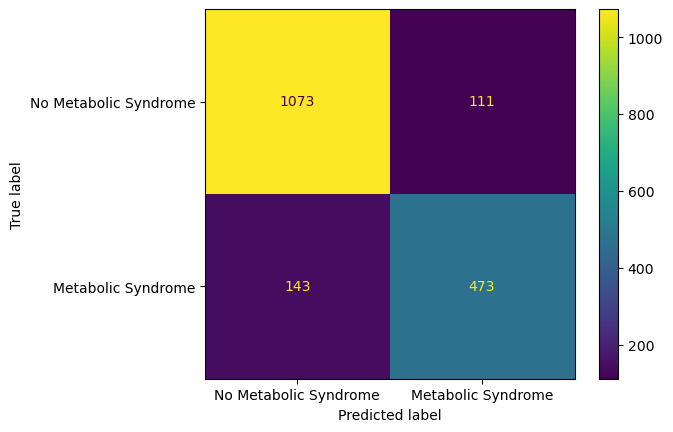

Model 3 Test 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.84      0.92      0.88       395
   Metabolic Syndrome       0.81      0.67      0.73       206

             accuracy                           0.83       601
            macro avg       0.83      0.79      0.81       601
         weighted avg       0.83      0.83      0.83       601



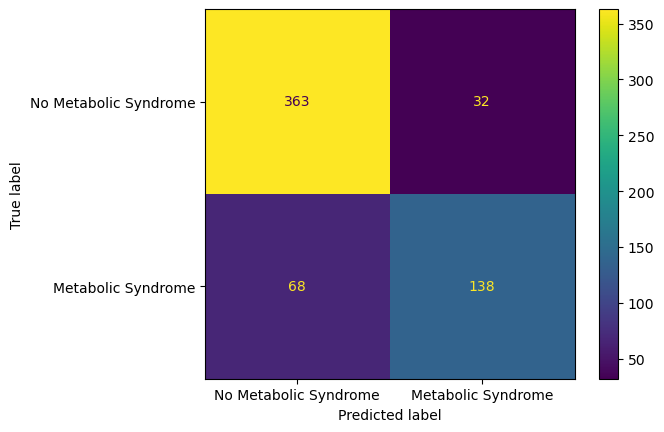

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
Model 1 Train,0.819757,0.767857,0.792959,0.862778
Model 1 Test,0.823529,0.679612,0.744681,0.840266
Model 2 Train,0.821306,0.775974,0.797997,0.865556
Model 2 Test,0.821839,0.694175,0.752632,0.843594
Model 3 Train,0.809932,0.767857,0.788333,0.858889
Model 3 Test,0.811765,0.669903,0.734043,0.833611


In [122]:
# Define labels for the confusion matrix
labels = ['No Metabolic Syndrome', 'Metabolic Syndrome']

train_scores = eval_classification(y_train, train_preds, labels=labels, name='Model 3 Train')
test_scores = eval_classification(y_test, test_preds, labels=labels, name='Model 3 Test')

scores = pd.concat([scores, pd.concat([train_scores, test_scores])])
scores

Changing the models optimizer siightly decreased our mmodel's metrics across the board from Model 2.

Model 4

Next I will try different values for the units and dropout. Using the suggested optimizer 'rmsprop'

In [123]:
# Build binary classification model within function
def build_model_4(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(units=hp.Int('units', min_value=1, max_value=30, step=5), input_dim =in_shape,
                          activation = 'relu'))
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.32, step=0.04)))

    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'rmsprop',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [124]:
# Define tuner object
tuner = kt.Hyperband(build_model_4,
                     objective='val_accuracy',
                     max_epochs=50,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Model_tuning2')

In [125]:
# Run the tuner
epochs = 100
tuner.search(X_train_nn, y_train,  epochs=epochs, validation_split=0.2,
             validation_data = (X_test_nn, y_test), callbacks = [early_stop])

Trial 79 Complete [00h 00m 06s]
val_accuracy: 0.841930091381073

Best val_accuracy So Far: 0.8502495884895325
Total elapsed time: 00h 04m 21s


In [126]:
# Obtain best hyperparameter values
best_hps2=tuner.get_best_hyperparameters()[0]
best_hps2.values

{'units': 26,
 'dropout_value': 0.24,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0061'}

In [127]:
# Obtain best model
tuned_model2 = tuner.get_best_models()[0]
tuned_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                650       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 27        
                                                                 
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [128]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [129]:
history4 = tuned_model2.fit(X_train_nn, y_train,
                        validation_data = (X_test_nn, y_test),
                         validation_split = .2, epochs=50, verbose = 0,
                       callbacks = [early_stop])

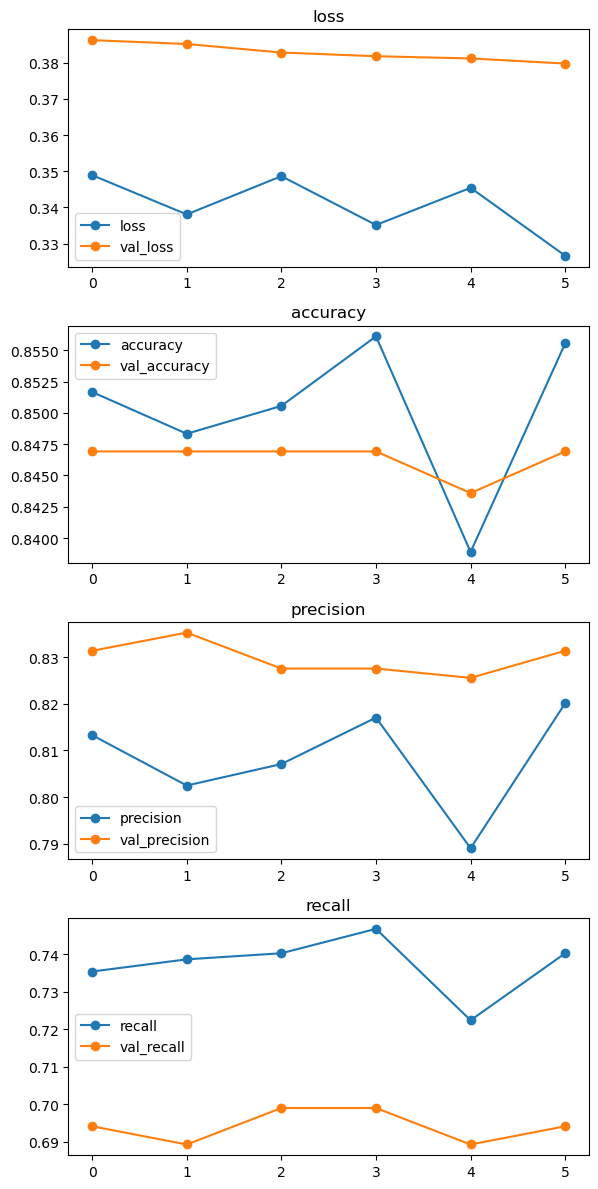

In [130]:
# plot learning history
plot_history(history4);

In [131]:
# Get predictions
train_pred_proba = tuned_model2.predict(X_train_nn)
test_pred_proba = tuned_model2.predict(X_test_nn)


# round predictions to integers instead of floats using np.rint()
train_preds = np.rint(train_pred_proba)
test_preds = np.rint(test_pred_proba)

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

19/19 [==============================] - 0s 913us/step
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]]


Model 4 Train 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.88      0.92      0.90      1184
   Metabolic Syndrome       0.83      0.76      0.79       616

             accuracy                           0.86      1800
            macro avg       0.86      0.84      0.85      1800
         weighted avg       0.86      0.86      0.86      1800



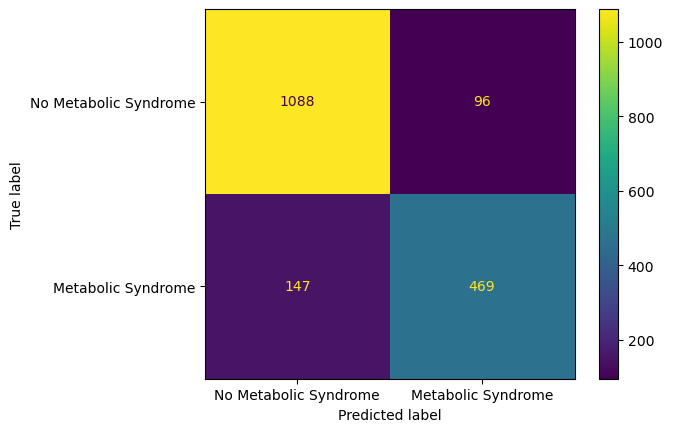

Model 4 Test 

                       precision    recall  f1-score   support

No Metabolic Syndrome       0.85      0.93      0.89       395
   Metabolic Syndrome       0.83      0.69      0.76       206

             accuracy                           0.85       601
            macro avg       0.84      0.81      0.82       601
         weighted avg       0.85      0.85      0.84       601



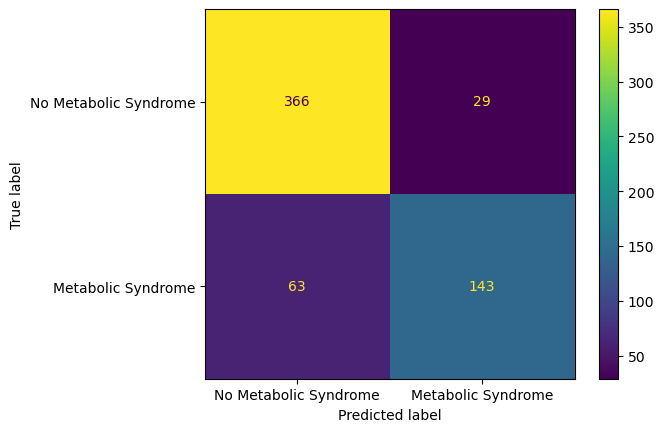

,Precision,Recall,F1 Score,Accuracy
Model Name,,,,
Model 1 Train,0.819757,0.767857,0.792959,0.862778
Model 1 Test,0.823529,0.679612,0.744681,0.840266
Model 2 Train,0.821306,0.775974,0.797997,0.865556
Model 2 Test,0.821839,0.694175,0.752632,0.843594
Model 3 Train,0.809932,0.767857,0.788333,0.858889
Model 3 Test,0.811765,0.669903,0.734043,0.833611
Model 4 Train,0.830088,0.761364,0.794242,0.865000
Model 4 Test,0.831395,0.694175,0.756614,0.846922


In [132]:
# Define labels for the confusion matrix
labels = ['No Metabolic Syndrome', 'Metabolic Syndrome']

train_scores = eval_classification(y_train, train_preds, labels=labels, name='Model 4 Train')
test_scores = eval_classification(y_test, test_preds, labels=labels, name='Model 4 Test')

scores = pd.concat([scores, pd.concat([train_scores, test_scores])])
scores

The model that performed the best was our 4th tuned model.